In [4]:
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
sns.set_style("dark")

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tools import eval_measures

In [6]:
main_price = pd.read_csv('../data/stock/rolling_mean_price.csv', index_col=0)

# Format the index
main_price.index = pd.to_datetime(main_price.index)
main_price

,Close
Date,
2017-08-04,180.270004
2017-08-07,180.800003
2017-08-08,179.986669
2017-08-09,178.935001
2017-08-10,176.976001
...,...
2021-12-27,612.830499
2021-12-28,612.729524
2021-12-29,610.191427


In [7]:
# Let's set aside 200 days of data
test_price = main_price.tail(200)
train_price = main_price.drop(main_price.tail(200).index, axis=0)

<AxesSubplot:xlabel='Date'>

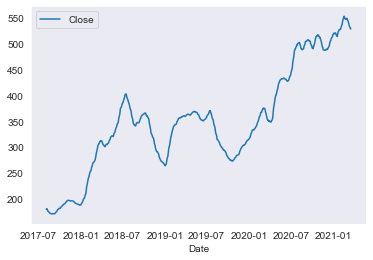

In [8]:
sns.lineplot(data=train_price)

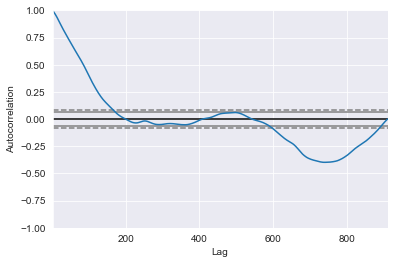

In [9]:
# Check for autocorrelation
autocorrelation_plot(train_price)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  911
Model:               ARIMA(150, 1, 0)   Log Likelihood               -1234.085
Date:                Sat, 06 Aug 2022   AIC                           2770.170
Time:                        15:13:50   BIC                           3497.000
Sample:                    08-04-2017   HQIC                          3047.677
                         - 03-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3728      0.036     10.284      0.000       0.302       0.444
ar.L2          0.2870      0.040      7.238      0.000       0.209       0.365
ar.L3          0.1821      0.041      4.456      0.0

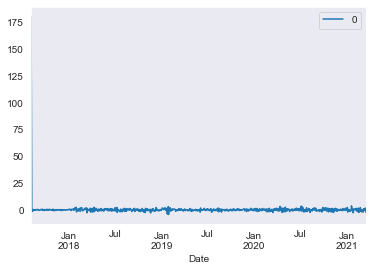

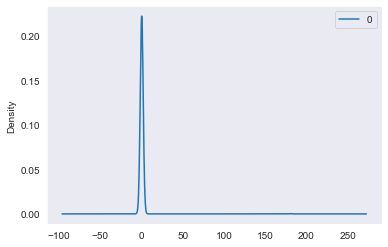

                0
count  911.000000
mean     0.243548
std      6.043319
min     -4.287600
25%     -0.464817
50%      0.069418
75%      0.558200
max    180.270004


In [10]:
# Change to period
train_price.index = train_price.index.to_period('D')
# fit model
model = ARIMA(train_price, order=(150,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [11]:
model_fit.save('mean_arima_model.pkl')

In [70]:
loaded = ARIMAResults.load('model.pkl')

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  911
Model:               ARIMA(160, 1, 0)   Log Likelihood               -3262.896
Date:                Sat, 06 Aug 2022   AIC                           6847.792
Time:                        14:46:22   BIC                           7622.756
Sample:                    08-04-2017   HQIC                          7143.677
                         - 03-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0764      0.037     -2.081      0.037      -0.148      -0.004
ar.L2          0.0301      0.038      0.791      0.429      -0.044       0.105
ar.L3         -0.0026      0.040     -0.064      0.9

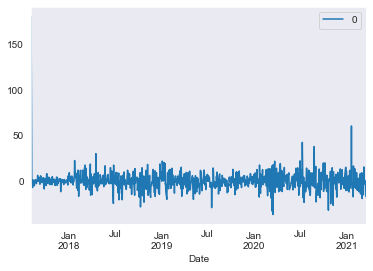

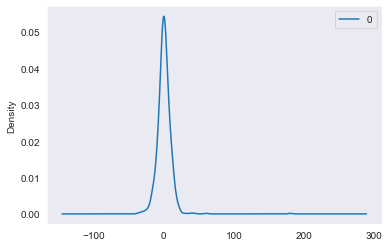

                0
count  911.000000
mean     0.613602
std     10.498652
min    -36.430929
25%     -3.938374
50%      0.405900
75%      5.182995
max    180.270004


In [71]:
# Checking if it loaded correctly
print(loaded.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [79]:
arima_pred = loaded.predict(start=test_price.index[1], end=test_price.index[-1])

In [75]:
end = main_price.index[-1]

Period('2021-12-31', 'D')

In [84]:
test_price.shape

(200, 1)

In [88]:
print(test_price.index[1])
print(test_price.index[-1])
print(arima_pred)

2021-03-22 00:00:00
2021-12-31 00:00:00
2021-03-22    507.392911
2021-03-23    509.593909
2021-03-24    507.996831
2021-03-25    507.375151
2021-03-26    506.569304
                 ...    
2021-12-27    508.053300
2021-12-28    508.652098
2021-12-29    508.456958
2021-12-30    508.158687
2021-12-31    508.091000
Freq: D, Name: predicted_mean, Length: 285, dtype: float64


In [85]:
arima_pred.shape

(285,)

In [82]:
eval_measures.rmse(test_price, arima_pred)

array([82.94912656, 81.44064275, 82.53212332, 82.96142477, 83.52150558,
       82.56938709, 83.51096502, 82.72177237, 82.62002555, 82.06570527,
       82.86417952, 81.87983845, 82.88691796, 82.02948774, 82.2411248 ,
       82.27376586, 83.15016332, 82.16507676, 82.59059693, 82.92139218,
       83.3567657 , 81.30304421, 81.93774154, 82.00171761, 81.89195944,
       81.57846165, 82.97761264, 82.46870403, 82.64790522, 81.77314169,
       82.28753471, 81.99427903, 82.07667332, 82.21933428, 81.65694558,
       82.05541728, 82.67368615, 81.42986093, 81.527219  , 83.06969445,
       82.17628484, 82.07216981, 82.20473701, 82.94272557, 82.07868298,
       81.10867209, 81.84983981, 82.77443201, 81.42671088, 82.58153704,
       82.19170052, 82.08710159, 82.44456547, 82.43031137, 81.79681191,
       82.91702778, 81.96380374, 82.56112353, 81.36338065, 82.43176495,
       82.41471023, 81.93116412, 82.12310988, 83.77471011, 82.02603975,
       82.69271187, 82.53266724, 82.17058948, 82.16435574, 82.20

In [83]:
sns.lineplot(x=test_price.index, y=[test_price, arima_pred])

ValueError: All arrays must be of the same length